In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
import warnings

import nltk
with open('D:\Data Science\Assignment\Assignment 11\stop.txt', 'r') as file:
    custom_stopwords = set(line.strip() for line in file)
    
with open('D:\Data Science\\Assignment\\Assignment 11\\negative-words.txt', 'r',encoding='latin-1') as file:
    negative_words = set(line.strip() for line in file)  
    
with open('D:\\Data Science\\Assignment\\Assignment 11\\positive-words.txt', 'r', encoding='latin-1') as file:
    positive_words = set(line.strip() for line in file)  
        
    
from nltk.stem import PorterStemmer
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 11\Elon_musk.csv",encoding='latin-1')
data.head(6)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj


In [3]:
data.rename(columns={"Unnamed: 0": "Number"},inplace=True)

In [4]:
ps = PorterStemmer
def preprocessing(x):
    x = re.sub('[^a-zA-Z]'," ",x)
    x.lower()
    x.split()
    x = [word for word in x if word not in set(custom_stopwords)]
    x = [ps.stem(word)for word in x]
    x = " ".join(x)
    return x

In [5]:
from nltk.stem import PorterStemmer
import re

ps = PorterStemmer()

def preprocessing(x):
    x = re.sub('[^A-Za-z]', ' ', x)
    x = [ps.stem(word) for word in x.split()]
    x = " ".join(x)
    positive_words_count = sum(1 for word in x if word in positive_words)
    negative_words_count = sum(1 for word in x if word in negative_words)
    return x

data['Text'] = data['Text'].apply(preprocessing)
data.head(6)


,Number,Text
0,1,kunalb i m an alien
1,2,id aa carmack ray trace on cyberpunk with hdr ...
2,3,joerogan spotifi great interview
3,4,gtera doge is underestim
4,5,teslacn congratul tesla china for amaz execut ...
5,6,happi new year of the ox http t co wfkmyu oj


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 

x = cv.fit_transform(data['Text']).toarray()
x = pd.DataFrame(x, columns=cv.get_feature_names_out())

In [7]:
from textblob import TextBlob
data['sentiment_score'] = data['Text'].apply(lambda text:TextBlob(text).sentiment.polarity)
data.head()

,Number,Text,sentiment_score
0,1,kunalb i m an alien,-0.250000
1,2,id aa carmack ray trace on cyberpunk with hdr ...,0.000000
2,3,joerogan spotifi great interview,0.800000
3,4,gtera doge is underestim,0.000000
4,5,teslacn congratul tesla china for amaz execut ...,0.166667


In [8]:
data.tail()

,Number,Text,sentiment_score
1994,1995,flcnhvi true it sound so surreal but the neg p...,0.186667
1995,1996,ppathol make sure to read ur term amp condit b...,0.500000
1996,1997,teslagong ppathol samwis gamge,0.000000
1997,1998,ppathol altho dumb and dumber is u f u f,-0.375000
1998,1999,progress updat august,0.000000


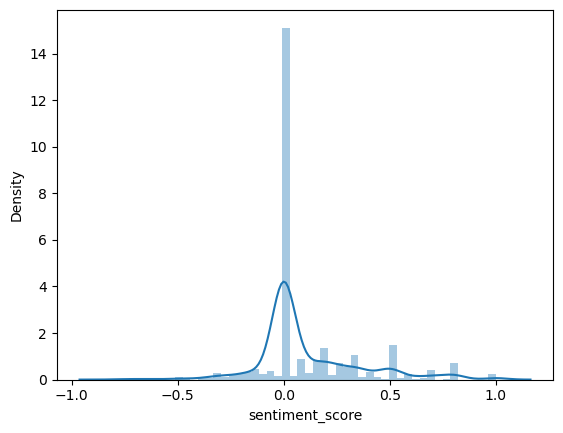

In [9]:
sns.distplot(data['sentiment_score'])
plt.show()

labels = ['sentiment_score']
plt.pie(labels)
